In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('employee_promotion.csv')

## Data Preprocessing

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [5]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
len(data.columns)

13

In [7]:
data.shape

(54808, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [9]:
## descriptive statistics
## for 37 years, working in same company -> rare case (outliers) also some employee leave the company
data.describe()          ## only show numerical data

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [10]:
## show categorical data

data.describe(include='object')          

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [11]:
data.duplicated().sum()

0

In [12]:
## counting no. of employees in each department

data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [13]:
## counting no. of employees in each training

data['no_of_trainings'].value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
10        5
9         5
Name: no_of_trainings, dtype: int64

In [14]:
## counting no.of employees based on age

data['age'].value_counts(ascending=True)

21      98
20     113
59     209
58     213
60     217
22     231
57     238
56     264
55     294
54     313
52     351
53     364
51     389
23     428
49     441
50     521
47     557
48     557
46     697
45     760
24     845
44     847
43     992
42    1149
41    1289
25    1299
40    1663
39    1695
38    1923
26    2060
37    2165
36    2517
35    2711
27    2827
34    3076
28    3147
33    3210
29    3405
31    3534
32    3534
30    3665
Name: age, dtype: int64

In [15]:
data['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [16]:
## counting no. of employees who won awards

data['awards_won'].value_counts()

0    53538
1     1270
Name: awards_won, dtype: int64

In [17]:
## counting no. of employees of different education

data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [18]:
sum(data['education'].value_counts())

52399

In [19]:
## counting no.of employees based on region

data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [20]:
data['is_promoted'].value_counts()       ## data is imbalance

0    50140
1     4668
Name: is_promoted, dtype: int64

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

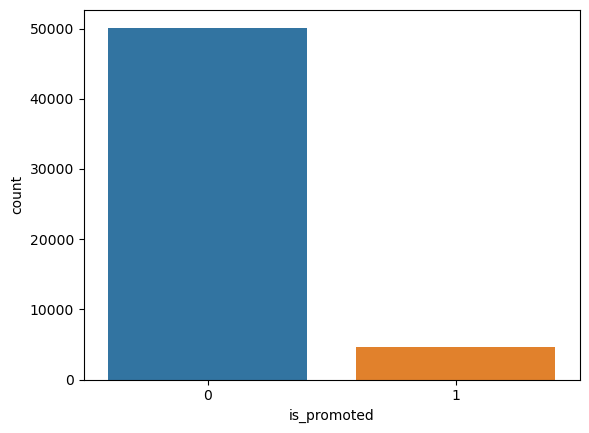

In [21]:
## plotting countplot and piechart

sns.countplot(x='is_promoted', data=data)

<AxesSubplot:ylabel='is_promoted'>

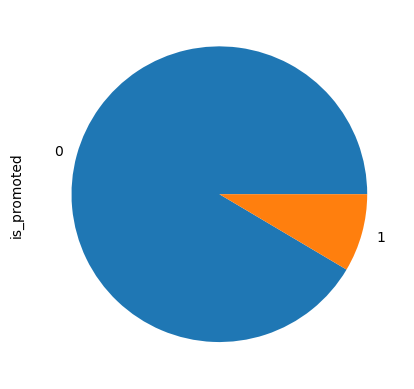

In [22]:
data['is_promoted'].value_counts().plot(kind='pie', labels=['0', '1'])

In [23]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [24]:
round((data.isnull().sum() / data.shape[0]) *100, 2)

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
awards_won              0.00
avg_training_score      4.67
is_promoted             0.00
dtype: float64

In [25]:
data.shape

(54808, 13)

In [26]:
(data.isnull().sum() / len(data)) *100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
awards_won              0.000000
avg_training_score      4.670851
is_promoted             0.000000
dtype: float64

## data cleaning

In [27]:
## impute missing values

data['education'] = data['education'].fillna(data['education'].mode()[0])

data['previous_year_rating'] = data['previous_year_rating'].fillna(data['previous_year_rating'].mode()[0])

data['avg_training_score'] = data['avg_training_score'].fillna(data['avg_training_score'].mean())

In [28]:
data['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [29]:
data['previous_year_rating'].mode()

0    3.0
Name: previous_year_rating, dtype: float64

In [30]:
data['avg_training_score'].mean()

63.71223778900407

In [31]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

### outlier detection

C:\Users\Rishika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


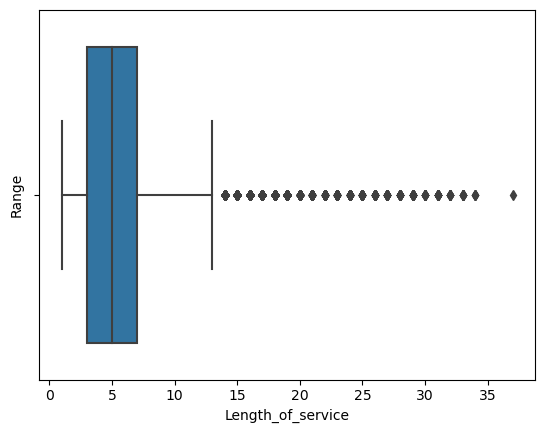

In [32]:
sns.boxplot(data['length_of_service'])
plt.xlabel('Length_of_service')
plt.ylabel('Range')
plt.show()

* Length of service contains outliers

C:\Users\Rishika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rishika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


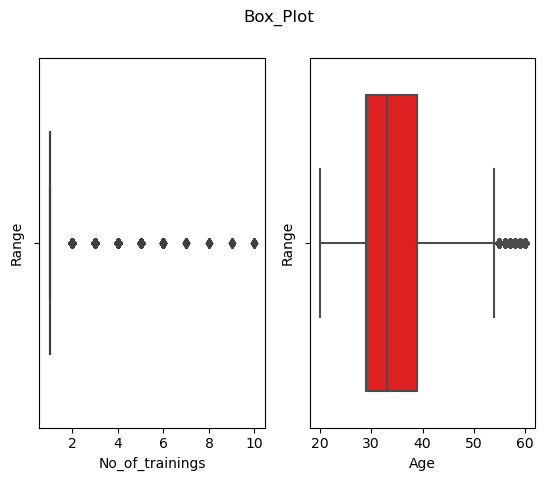

In [33]:
plt.subplot(1,2,1)
sns.boxplot(data['no_of_trainings'], width=0.6)
plt.xlabel('No_of_trainings')
plt.ylabel('Range')

plt.subplot(1,2,2)
sns.boxplot(data['age'], color='red')
plt.xlabel('Age')
plt.ylabel('Range')

plt.suptitle('Box_Plot')
plt.show()

C:\Users\Rishika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


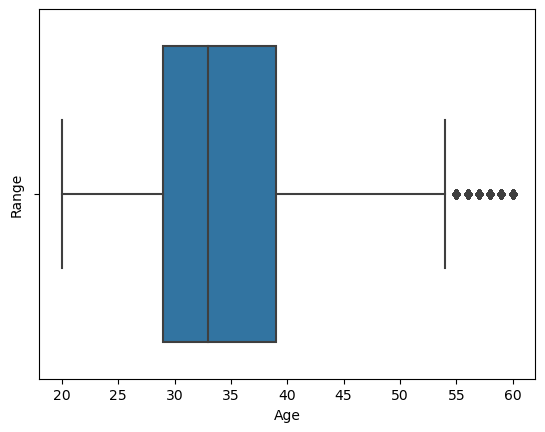

In [34]:
sns.boxplot(data['age'])
plt.xlabel('Age')
plt.ylabel('Range')
plt.show()

C:\Users\Rishika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


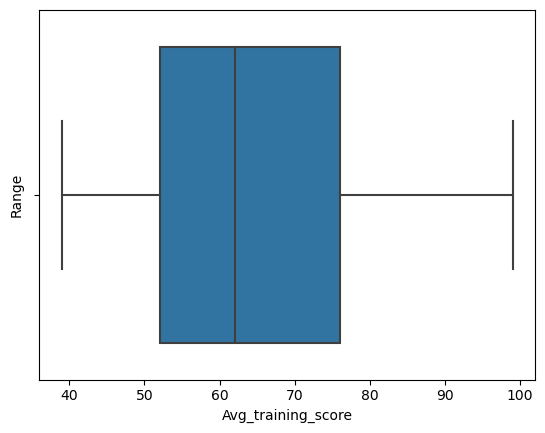

In [35]:
sns.boxplot(data['avg_training_score'])
plt.xlabel('Avg_training_score')
plt.ylabel('Range')
plt.show()

### removing outliers

In [36]:
## using IQR

q1 = data['length_of_service'].quantile(0.25)
q3 = data['length_of_service'].quantile(0.75)
IQR = q3-q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df = data[(data['length_of_service'] >= lower_bound) & (data['length_of_service'] <= upper_bound)]

In [37]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.000000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.000000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.000000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.000000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.000000,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.000000,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.000000,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,63.712238,0


In [38]:
df.shape         ## without outliers

(51319, 13)

In [39]:
data.shape       ## with outliers

(54808, 13)

C:\Users\Rishika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


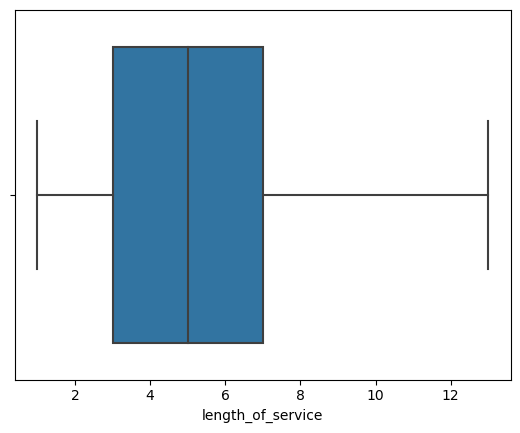

In [40]:
sns.boxplot(df['length_of_service'])
plt.show()

## univariate analysis

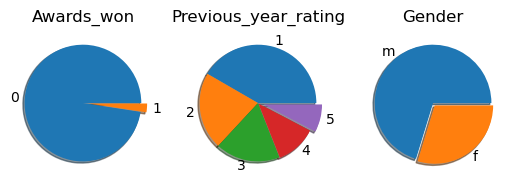

In [41]:
## pie chart for categorical features

plt.subplot(1, 3, 1)
plt.pie(x = df['awards_won'].value_counts(), labels=['0' ,'1'], explode=[0,0.1], shadow=True)
plt.title('Awards_won')

plt.subplot(1,3,2)
plt.pie(x = df['previous_year_rating'].value_counts(), labels=['1','2','3','4','5'], explode=[0,0,0,0.01,0.1], shadow=True)
plt.title('Previous_year_rating')

plt.subplot(1,3,3)
plt.pie(x = df['gender'].value_counts(), labels=['m','f'], explode=[0,0.05], shadow=True)
plt.title('Gender')

plt.show()

<AxesSubplot:ylabel='Density'>

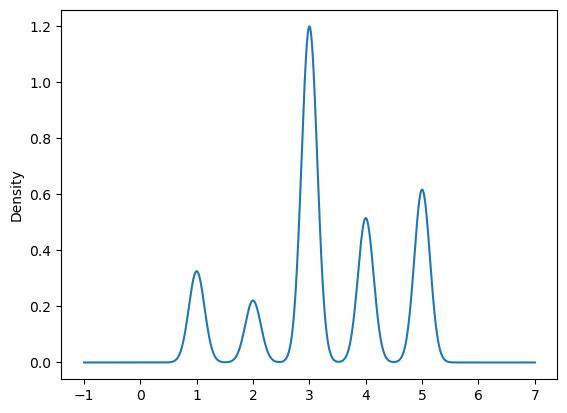

In [42]:
df['previous_year_rating'].plot(kind='kde')

In [43]:
df['previous_year_rating'].skew()

-0.25894844803808653

In [44]:
df['previous_year_rating'].isnull().sum()

0

In [45]:
df['awards_won'].describe()

count    51319.000000
mean         0.024163
std          0.153555
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: awards_won, dtype: float64

<AxesSubplot:ylabel='Density'>

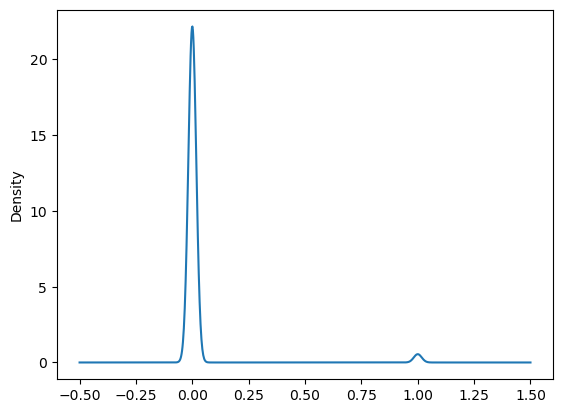

In [46]:
df['awards_won'].plot(kind='kde')

In [47]:
df['awards_won'].skew()

6.197846137630514

In [48]:
df['awards_won'].isnull().sum()

0

<AxesSubplot:xlabel='no_of_trainings', ylabel='count'>

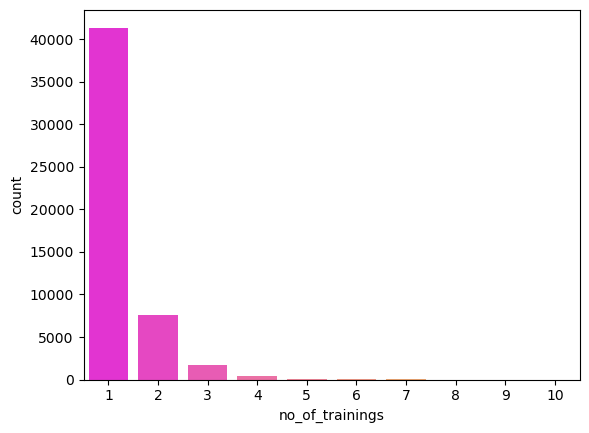

In [49]:
sns.countplot(x = df['no_of_trainings'], palette='spring')

<AxesSubplot:ylabel='Density'>

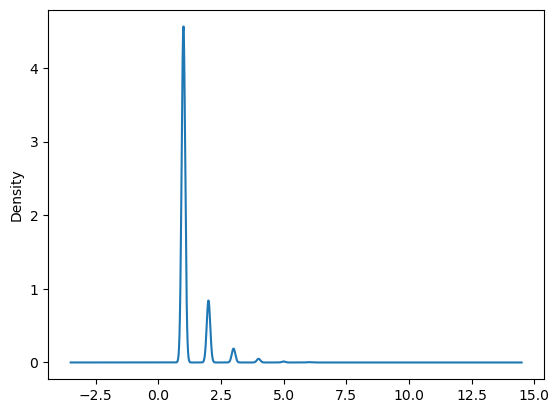

In [50]:
df['no_of_trainings'].plot(kind='kde')

In [51]:
df['no_of_trainings'].skew()

3.4030464251695536

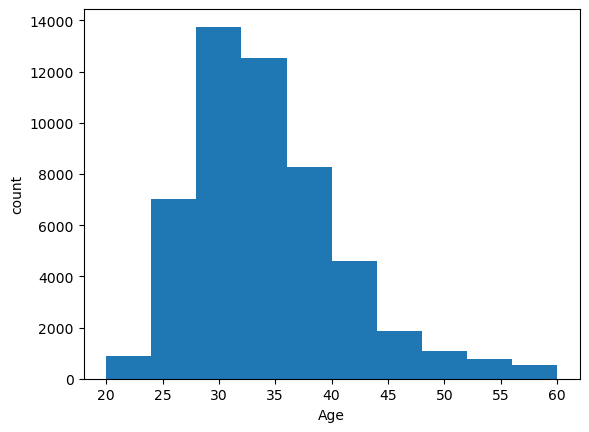

In [52]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

* we have more no. of employees between age group 30 and 40

<AxesSubplot:>

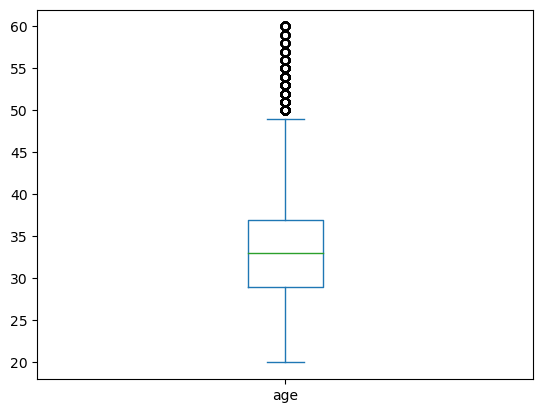

In [53]:
df['age'].plot(kind='box')

In [54]:
df[df['age']>59]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
464,43399,Operations,region_2,Bachelor's,f,other,1,60,5.0,4,0,56.0,0
777,23578,Sales & Marketing,region_7,Bachelor's,m,sourcing,1,60,2.0,12,0,48.0,0
1402,4882,HR,region_2,Master's & above,m,sourcing,1,60,5.0,13,0,50.0,0
1865,65857,Technology,region_2,Master's & above,f,referred,1,60,3.0,5,0,78.0,0
2314,40933,Operations,region_22,Master's & above,m,other,1,60,5.0,4,1,60.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52303,42826,Operations,region_2,Bachelor's,f,other,1,60,4.0,4,0,56.0,0
52394,38192,Sales & Marketing,region_13,Bachelor's,m,other,1,60,5.0,8,0,46.0,0
53028,41001,Operations,region_2,Bachelor's,f,other,1,60,5.0,8,0,58.0,0
54024,3752,HR,region_2,Master's & above,m,sourcing,1,60,5.0,8,1,50.0,1


* total 121 employees are of age 60

<AxesSubplot:xlabel='department', ylabel='count'>

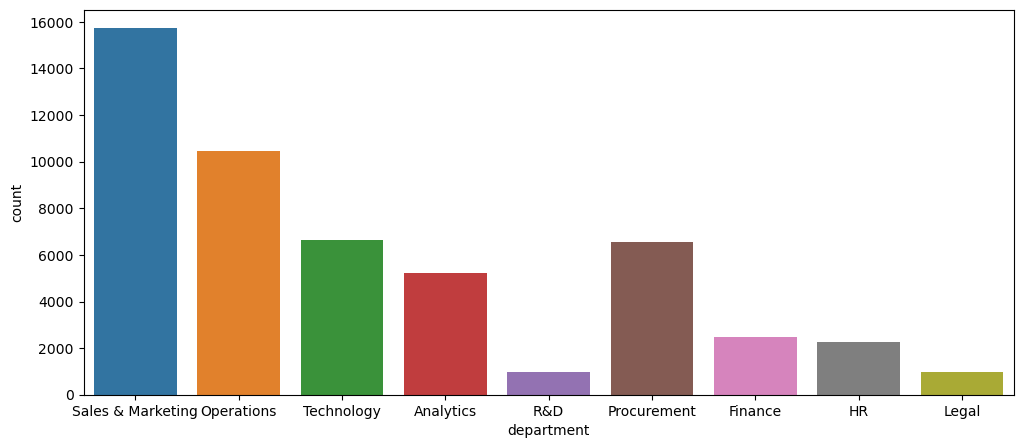

In [55]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['department'])

* Sales and Marketing department has more no. of employees

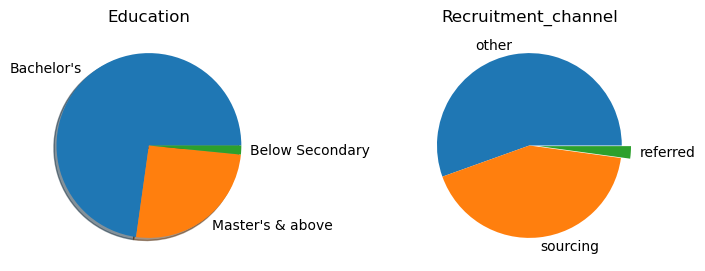

In [56]:
## piechart

plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plt.pie(x = df['education'].value_counts(), labels=df['education'].value_counts().index, shadow=True)
plt.title('Education')

plt.subplot(1,2,2)
plt.pie(x = df['recruitment_channel'].value_counts(), labels=df['recruitment_channel'].value_counts().index, explode=[0,0,0.1])
plt.title('Recruitment_channel')

plt.show()

In [57]:
df['education'].value_counts()

Bachelor's          37348
Master's & above    13166
Below Secondary       805
Name: education, dtype: int64

## bivariate analysis

In [58]:
df.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0


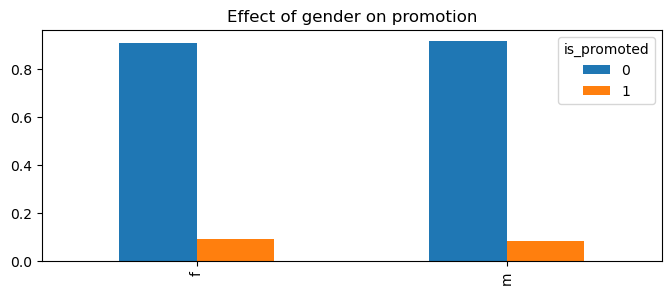

In [59]:
## gender and promotion

x = pd.crosstab(df['gender'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=False, figsize=(8,3))
plt.title('Effect of gender on promotion')
plt.xlabel("")
plt.show()

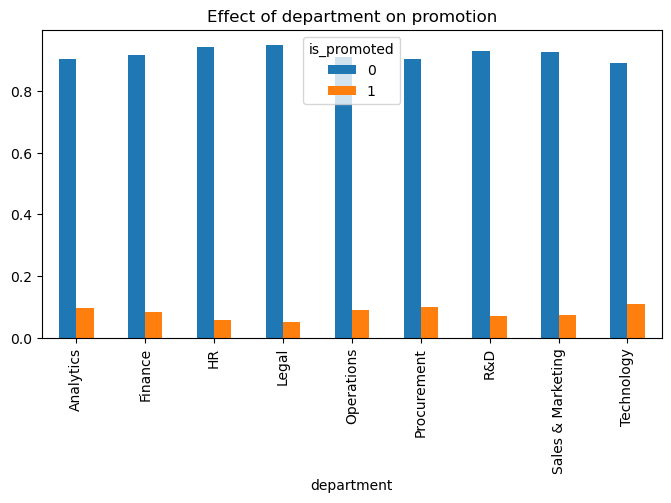

In [60]:
## department and promotion

x = pd.crosstab(df['department'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(8,4))
plt.title('Effect of department on promotion')
#plt.xlabel("")
plt.show()

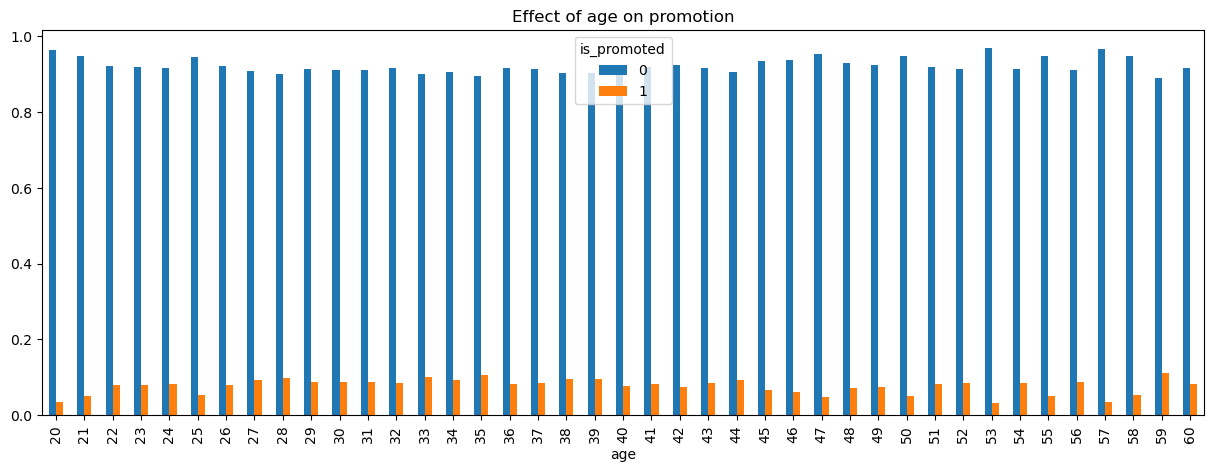

In [61]:
## age and promotion

x = pd.crosstab(df['age'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind = 'bar', figsize=(15,5))
plt.title('Effect of age on promotion')
plt.show()

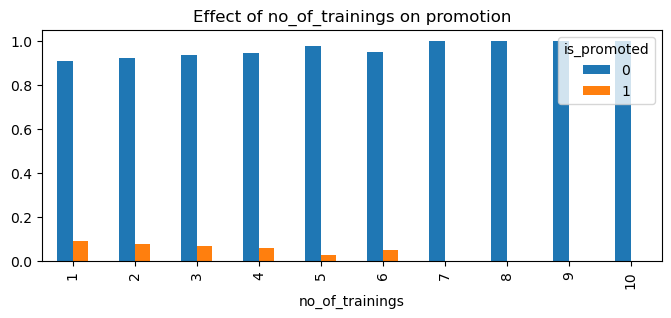

In [62]:
## no_of_trainings and promotion

x = pd.crosstab(df['no_of_trainings'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind = 'bar', figsize=(8,3))
plt.title('Effect of no_of_trainings on promotion')
plt.show()

In [63]:
x.sum(1)

no_of_trainings
1     41340
2      7628
3      1711
4       452
5       122
6        40
7        11
8         5
9         5
10        5
dtype: int64

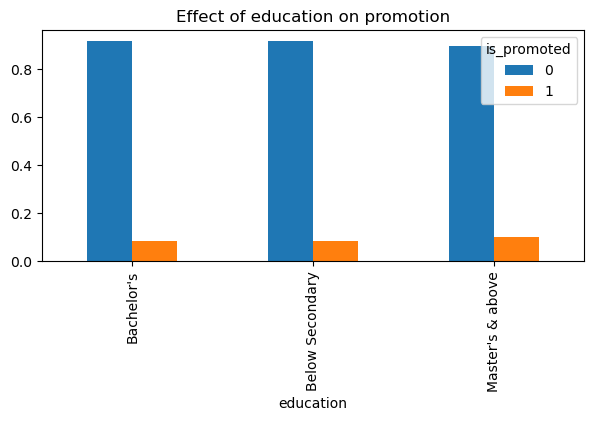

In [64]:
## education and promotion

x = pd.crosstab(df['education'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(7,3))
plt.title('Effect of education on promotion')
plt.show()

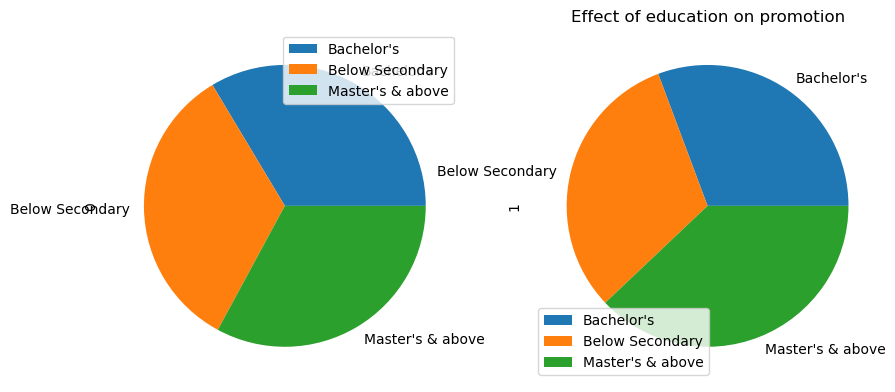

In [65]:
## education and promotion

x = pd.crosstab(df['education'], df['is_promoted'])
x_div = x.div(x.sum(1).astype(float), axis=0)
x_div.plot(kind='pie',figsize=(10,8), subplots=True)
plt.title('Effect of education on promotion')
plt.show()

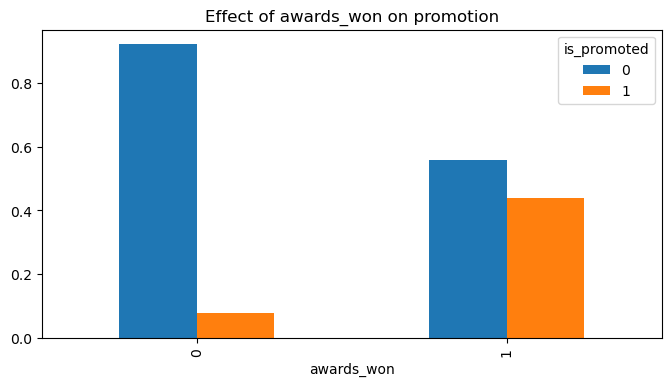

In [66]:
## awards_won and promotion

x = pd.crosstab(df['awards_won'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar',figsize=(8,4))
plt.title('Effect of awards_won on promotion')
plt.show()

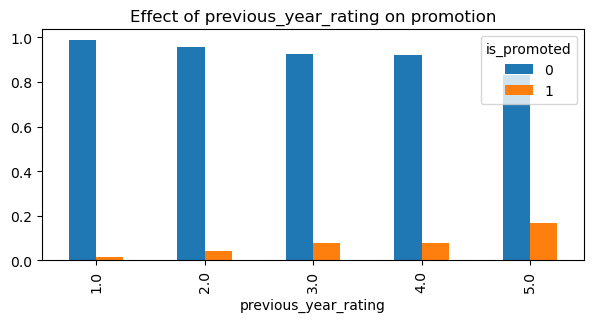

In [67]:
## previous_year_rating and promotion

x = pd.crosstab(df['previous_year_rating'], df['is_promoted'])
x.div(x.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(7,3))
plt.title('Effect of previous_year_rating on promotion')
plt.show()

In [68]:
pd.crosstab(df['is_promoted'], df['gender'], normalize='columns')*100

gender,f,m
is_promoted,,
0,90.803618,91.595264
1,9.196382,8.404736


In [69]:
pd.crosstab(df['is_promoted'],df['education'], normalize='columns')*100

education,Bachelor's,Below Secondary,Master's & above
is_promoted,,,
0,91.854986,91.677019,89.936199
1,8.145014,8.322981,10.063801


In [70]:
pd.crosstab(df['is_promoted'],df['department'], normalize='columns')*100

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
is_promoted,,,,,,,,,
0,90.351045,91.656492,94.297082,94.974874,90.875251,90.165931,93.023256,92.691452,89.036545
1,9.648955,8.343508,5.702918,5.025126,9.124749,9.834069,6.976744,7.308548,10.963455


In [71]:
pd.crosstab(df['is_promoted'],df['no_of_trainings'], normalize='columns')*100

no_of_trainings,1,2,3,4,5,6,7,8,9,10
is_promoted,,,,,,,,,,
0,91.030479,92.383325,93.33723,94.247788,97.540984,95.0,100.0,100.0,100.0,100.0
1,8.969521,7.616675,6.66277,5.752212,2.459016,5.0,0.0,0.0,0.0,0.0


In [72]:
pd.crosstab(df['is_promoted'], df['age'], normalize='columns')*100

age,20,21,22,23,24,25,26,27,28,29,...,51,52,53,54,55,56,57,58,59,60
is_promoted,,,,,,,,,,,,,,,,,,,,,
0,96.460177,94.897959,92.207792,92.056075,91.715976,94.688222,92.087379,90.767598,90.212901,91.365639,...,91.880342,91.509434,96.875,91.515152,94.857143,91.269841,96.666667,94.791667,89.010989,91.735537
1,3.539823,5.102041,7.792208,7.943925,8.284024,5.311778,7.912621,9.232402,9.787099,8.634361,...,8.119658,8.490566,3.125,8.484848,5.142857,8.730159,3.333333,5.208333,10.989011,8.264463


In [73]:
pd.crosstab(df['is_promoted'], df['awards_won'], normalize='columns')*100

awards_won,0,1
is_promoted,,
0,92.236267,55.967742
1,7.763733,44.032258


## multivariate analysis

In [74]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
employee_id,1.000000,-0.004887,0.000159,0.005505,-0.000226,0.009108,-0.001937,0.000983
no_of_trainings,-0.004887,1.000000,-0.075498,-0.063506,-0.047792,-0.009258,0.044116,-0.026878
age,0.000159,-0.075498,1.000000,0.032487,0.509003,0.005032,-0.046248,-0.010106
previous_year_rating,0.005505,-0.063506,0.032487,1.000000,0.035977,0.027735,0.071848,0.155162
length_of_service,-0.000226,-0.047792,0.509003,0.035977,1.000000,-0.032341,-0.033156,0.002876
awards_won,0.009108,-0.009258,0.005032,0.027735,-0.032341,1.000000,0.071779,0.198223
avg_training_score,-0.001937,0.044116,-0.046248,0.071848,-0.033156,0.071779,1.000000,0.179888
is_promoted,0.000983,-0.026878,-0.010106,0.155162,0.002876,0.198223,0.179888,1.000000


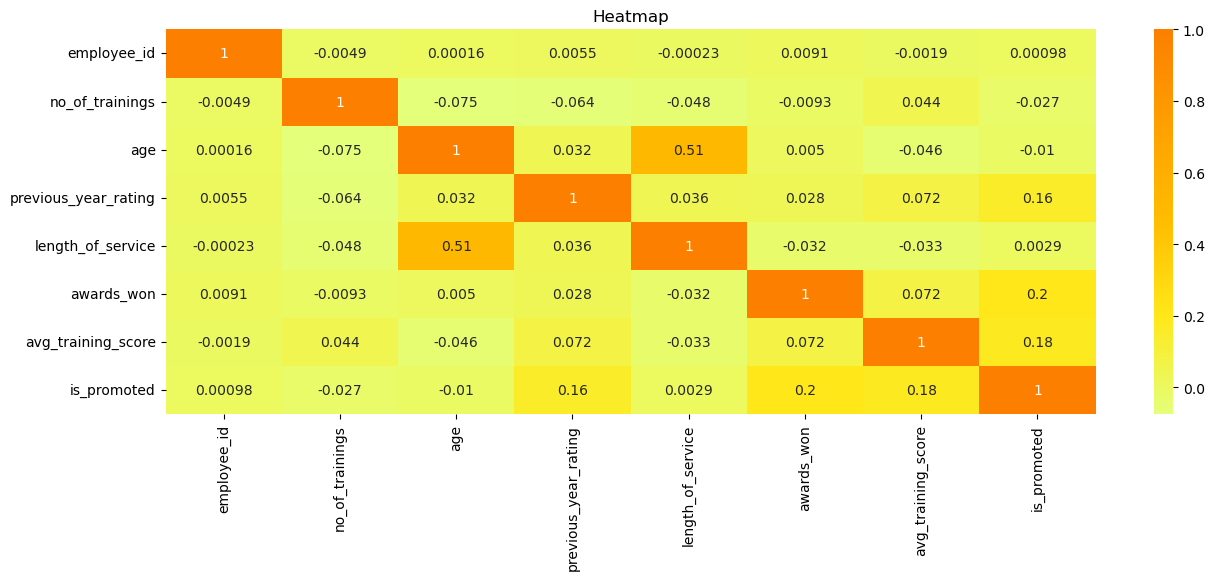

In [75]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap='Wistia')
plt.title('Heatmap')
plt.show()                       

* length_of_service and age are highly positively correlated

C:\Users\Rishika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


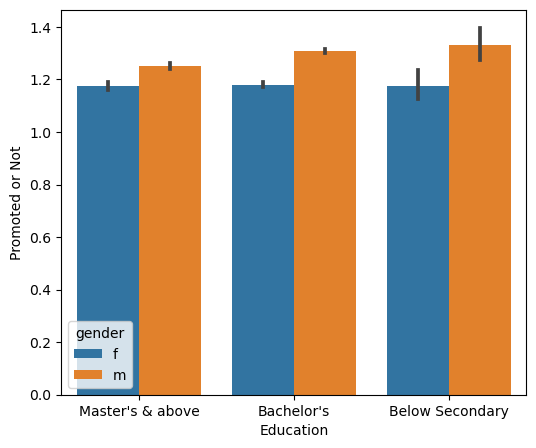

In [76]:
plt.figure(figsize=(6,5))
sns.barplot(df['education'], df['no_of_trainings'], hue=df['gender'])
plt.xlabel('Education')
plt.ylabel('Promoted or Not')
plt.show()

## Feature Engineering

In [77]:
## new_column

df['total_training_score'] = df['avg_training_score'] * df['no_of_trainings']

C:\Users\Rishika\AppData\Local\Temp\ipykernel_5148\1168226435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_training_score'] = df['avg_training_score'] * df['no_of_trainings']


In [78]:
df.head(1)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,total_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0,49.0


In [79]:
## remove column

df.drop(columns=['employee_id', 'region', 'recruitment_channel'], axis=1, inplace=True)

C:\Users\Rishika\AppData\Local\Temp\ipykernel_5148\2329611839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['employee_id', 'region', 'recruitment_channel'], axis=1, inplace=True)


In [80]:
df.shape

(51319, 11)

In [81]:
df['avg_training_score'].mean()

63.79787753047771

In [82]:
df[(df['previous_year_rating']==1.0) & (df['awards_won']==0) & (df['avg_training_score']<60) &
(df['is_promoted']==1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,total_training_score
573,Sales & Marketing,Master's & above,f,1,39,1.0,10,0,52.0,1,52.0
3451,Sales & Marketing,Bachelor's,m,1,24,1.0,3,0,50.0,1,50.0
4888,Sales & Marketing,Bachelor's,m,1,42,1.0,10,0,50.0,1,50.0
12241,Legal,Bachelor's,m,1,31,1.0,6,0,56.0,1,56.0
16807,Sales & Marketing,Bachelor's,m,1,35,1.0,10,0,57.0,1,57.0
17281,Sales & Marketing,Bachelor's,m,1,30,1.0,4,0,49.0,1,49.0
19582,Sales & Marketing,Bachelor's,m,2,27,1.0,2,0,46.0,1,92.0
21266,Sales & Marketing,Bachelor's,m,1,34,1.0,10,0,52.0,1,52.0
23209,Operations,Bachelor's,m,1,37,1.0,5,0,58.0,1,58.0
27296,Operations,Bachelor's,m,1,43,1.0,13,0,59.0,1,59.0


In [83]:
df = df.drop(df[(df['previous_year_rating']==1.0) & (df['awards_won']==0) & (df['avg_training_score']<60) &
(df['is_promoted']==1)].index)

In [84]:
df.shape

(51304, 11)

In [85]:
df.select_dtypes('int64').head(1)

,no_of_trainings,age,length_of_service,awards_won,is_promoted
0,1,35,8,0,0


In [86]:
df.select_dtypes('float').columns

Index(['previous_year_rating', 'avg_training_score', 'total_training_score'], dtype='object')

In [87]:
df.select_dtypes('object').head()

,department,education,gender
0,Sales & Marketing,Master's & above,f
1,Operations,Bachelor's,m
2,Sales & Marketing,Bachelor's,m
3,Sales & Marketing,Bachelor's,m
4,Technology,Bachelor's,m


## encode categorical features
### department -> OHE, education -> ordinal encoder, gender -> OHE

In [88]:
from sklearn.compose import ColumnTransformer

In [89]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [90]:
transformer = ColumnTransformer(transformers=[
    ('tnf1', OrdinalEncoder(categories=[['Below Secondary','Bachelor\'s','Master\'s & above']]), ['education']),
    ('tnf2', OneHotEncoder(drop='first', sparse=False), ['department', 'gender'])
], remainder='passthrough')

In [91]:
transformed = transformer.fit_transform(df[['education','department','gender']])       ## array

In [92]:
transformed.shape

(51304, 10)

In [93]:
oe_feature_name = ['education_scaled'] 

In [94]:
ohe_feature_names = transformer.named_transformers_['tnf2'].get_feature_names_out(input_features=['department','gender'])

In [95]:
ohe_feature_names

array(['department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'gender_m'], dtype=object)

In [96]:
#num_features = ['no_of_trainings','age','previous_year_rating','length_of_service','awards_won','avg_training_score','is_promoted','total_training_score']

In [97]:
feature_names = list(oe_feature_name) + list(ohe_feature_names)

In [98]:
feature_names

['education_scaled',
 'department_Finance',
 'department_HR',
 'department_Legal',
 'department_Operations',
 'department_Procurement',
 'department_R&D',
 'department_Sales & Marketing',
 'department_Technology',
 'gender_m']

In [99]:
trans_df = pd.DataFrame(data=transformed, columns=feature_names)
trans_df.head()

,education_scaled,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [100]:
df.head(1)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,total_training_score
0,Sales & Marketing,Master's & above,f,1,35,5.0,8,0,49.0,0,49.0


In [101]:
trans_df.shape

(51304, 10)

In [102]:
df.shape

(51304, 11)

In [103]:
trans_df1 = trans_df.reset_index(drop=True)
df1 = df.reset_index(drop=True)

In [104]:
new_df = pd.concat([df1.drop(columns=['department','education','gender']), trans_df1], axis=1)

In [105]:
new_df.shape

(51304, 18)

In [106]:
new_df.isnull().sum()

no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
is_promoted                     0
total_training_score            0
education_scaled                0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
gender_m                        0
dtype: int64

In [107]:
new_df.head(1)

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,total_training_score,education_scaled,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,gender_m
0,1,35,5.0,8,0,49.0,0,49.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [108]:
## inde and dep variable

X = new_df.drop(columns=['is_promoted'], axis=1)
y = new_df['is_promoted']

In [109]:
print(X.shape)
print(y.shape)

(51304, 17)
(51304,)


In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=24)

### resolve imbalance using SMOTE

In [111]:
y_train.value_counts()

0    37508
1     3535
Name: is_promoted, dtype: int64

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE - Class distribution:",y_train.value_counts())
print("After SMOTE - Class distribution:",y_train_res.value_counts())

Before SMOTE - Class distribution: 0    37508
1     3535
Name: is_promoted, dtype: int64
After SMOTE - Class distribution: 0    37508
1    37508
Name: is_promoted, dtype: int64


In [114]:
print(X_train_res.shape)
print(y_train_res.shape)

(75016, 17)
(75016,)


In [115]:
y_train_res.value_counts()                # balance

0    37508
1    37508
Name: is_promoted, dtype: int64

In [116]:
X_test.shape

(10261, 17)

### Feature Scaling

In [117]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_sca = sc.fit_transform(X_train_res)
X_test_sca = sc.transform(X_test)

In [118]:
print(X_train_sca.shape)
print(X_test_sca.shape)

(75016, 17)
(10261, 17)


### Model Implementation

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [120]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train_sca, y_train_res)

LogisticRegression(class_weight='balanced')

In [121]:
y_pred_lr = lr.predict(X_test_sca)
y_proba_lr = lr.predict_proba(X_test_sca)[:,1]

# 1. Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: ", accuracy_lr)

# 2. ROC AUC Score
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print("Logistic Regression ROC AUC: ", roc_auc_lr)

classification_report_lr = classification_report(y_test, y_pred_lr)
print("Logistic Regression Class_report: \n", classification_report_lr)

Logistic Regression Accuracy:  0.742422765812299
Logistic Regression ROC AUC:  0.7746539260161451
Logistic Regression Class_report: 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      9377
           1       0.20      0.65      0.30       884

    accuracy                           0.74     10261
   macro avg       0.58      0.70      0.57     10261
weighted avg       0.89      0.74      0.80     10261



### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train_sca, y_train_res)

DecisionTreeClassifier(class_weight='balanced')

In [125]:
y_pred_dt = dt.predict(X_test_sca)
y_proba_dt = dt.predict_proba(X_test_sca)[:,1]

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy: ", accuracy_dt)

# ROC AUC Score
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print("Decision Tree ROC AUC: ", roc_auc_dt)

classification_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree class_report: \n", classification_report_dt)

Decision Tree Test Accuracy:  0.8803235552090439
Decision Tree ROC AUC:  0.6584703257271932
Decision Tree class_report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      9377
           1       0.33      0.37      0.35       884

    accuracy                           0.88     10261
   macro avg       0.63      0.65      0.64     10261
weighted avg       0.89      0.88      0.88     10261



### RandomForest

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_sca, y_train_res)

RandomForestClassifier(class_weight='balanced')

In [128]:
y_pred_rf = rf.predict(X_test_sca)
y_proba_rf = rf.predict_proba(X_test_sca)[:,1]         ## probability of pos class(1)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("RFC Test Accuracy: ", accuracy_rf)

# ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("RFC ROC AUC: ", roc_auc_rf)

classification_report_rf = classification_report(y_test, y_pred_rf)
print("RF class_report: \n", classification_report_rf)

RFC Test Accuracy:  0.9144332911022317
RFC ROC AUC:  0.7559008226058078
RF class_report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      9377
           1       0.51      0.34      0.40       884

    accuracy                           0.91     10261
   macro avg       0.72      0.65      0.68     10261
weighted avg       0.90      0.91      0.91     10261



### XGBoost

In [130]:
import xgboost as xgb
from xgboost import XGBClassifier

In [131]:
scale = len(y_train_res[y_train_res==0]) / len(y_train_res[y_train_res==1])
xgb = XGBClassifier(scale_pos_weight=scale, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_sca, y_train_res)

C:\Users\Rishika\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:29:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [132]:
y_pred_xgb = xgb.predict(X_test_sca)
y_proba_xgb = xgb.predict_proba(X_test_sca)[:,1]         ## probability of pos class(1)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGB Test Accuracy: ", accuracy_xgb)

# ROC AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("XGB ROC AUC: ", roc_auc_xgb)

classification_report_xgb = classification_report(y_test, y_pred_xgb)
print("XGB Class_report: \n", classification_report_xgb)

XGB Test Accuracy:  0.9282720982360394
XGB ROC AUC:  0.7873521522045133
XGB Class_report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      9377
           1       0.65      0.36      0.46       884

    accuracy                           0.93     10261
   macro avg       0.80      0.67      0.71     10261
weighted avg       0.92      0.93      0.92     10261



In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_sca, y_train_res)
y_pred_gb = gb.predict(X_test_sca)
y_proba_gb = gb.predict_proba(X_test_sca)[:,1] 

# Accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("GB Test Accuracy: ", accuracy_gb)

# ROC AUC Score
roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
print("GB ROC AUC: ", roc_auc_gb)

classification_report_gb = classification_report(y_test, y_pred_gb)
print("GB Class_report: \n", classification_report_gb)

GB Test Accuracy:  0.910632491959848
GB ROC AUC:  0.7946346408392152
GB Class_report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9377
           1       0.48      0.39      0.43       884

    accuracy                           0.91     10261
   macro avg       0.71      0.68      0.69     10261
weighted avg       0.90      0.91      0.91     10261



In [134]:
# Define model names and their respective metric scores
model_results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost','Gradient Boosting'],
    'Test Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_gb],
    'ROC AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_gb]
}

# Create DataFrame
results_df = pd.DataFrame(model_results)

# Display table
results_df

,Model,Test Accuracy,ROC AUC
0,Logistic Regression,0.742423,0.774654
1,Decision Tree,0.880324,0.658470
2,Random Forest,0.914433,0.755901
3,XGBoost,0.928272,0.787352
4,Gradient Boosting,0.910632,0.794635


### Hyperparameter tunning

In [135]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight='balanced', max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs']  # Solvers compatible with binary classification
}

# Grid Search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_sca, y_train_res)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)

# Best estimator
best_lr = grid_search.best_estimator_

# Predict on test set
y_pred_lr = best_lr.predict(X_test_sca)
y_proba_lr = best_lr.predict_proba(X_test_sca)[:,1]

lr_acc = accuracy_score(y_test, y_pred_lr)
print("LR Test Accuracy: ", lr_acc)

lr_roc_auc = roc_auc_score(y_test, y_proba_lr)
print("LR ROC AUC: ", lr_roc_auc)

lr_classification_report = classification_report(y_test, y_pred_lr)
print("Logistic Regression class_report: \n", lr_classification_report)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters:  {'C': 0.01, 'solver': 'saga'}
LR Test Accuracy:  0.7394990741643115
LR ROC AUC:  0.7777380342872253
Logistic Regression class_report: 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      9377
           1       0.20      0.66      0.30       884

    accuracy                           0.74     10261
   macro avg       0.58      0.70      0.57     10261
weighted avg       0.89      0.74      0.79     10261



In [136]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search
grid_search_dt = GridSearchCV(dt, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train_sca, y_train_res)

# Best model
best_dt = grid_search_dt.best_estimator_
print("Best Parameters:", grid_search_dt.best_params_)

# Evaluate
y_pred_dt = best_dt.predict(X_test_sca)
y_proba_dt = best_dt.predict_proba(X_test_sca)[:, 1]

dt_acc = accuracy_score(y_test, y_pred_dt)
print("dt Test Accuracy: ", dt_acc)
dt_roc_auc = roc_auc_score(y_test, y_proba_dt)
print("dt ROC AUC: ", dt_roc_auc)
dt_classification_report = classification_report(y_test, y_pred_dt)
print("dt class_report: \n", dt_classification_report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
dt Test Accuracy:  0.8821752265861027
dt ROC AUC:  0.6591851656865239
dt class_report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      9377
           1       0.33      0.37      0.35       884

    accuracy                           0.88     10261
   macro avg       0.64      0.65      0.64     10261
weighted avg       0.89      0.88      0.88     10261



In [137]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Grid Search
grid_search_rf = GridSearchCV(rf, param_grid, scoring='recall', cv=5, verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_sca, y_train_res)

# Best model
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)

# Evaluate
y_pred_rf = best_rf.predict(X_test_sca)
y_proba_rf = best_rf.predict_proba(X_test_sca)[:, 1]

rf_acc = accuracy_score(y_test, y_pred_rf)
print("RF Test Accuracy: ", rf_acc)
rf_roc_auc = roc_auc_score(y_test, y_proba_rf)
print("RF ROC AUC: ", rf_roc_auc)
rf_classification_report = classification_report(y_test, y_pred_rf)
print("RF class_report: \n", rf_classification_report)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RF Test Accuracy:  0.9156027677614268
RF ROC AUC:  0.7590818634407767
RF class_report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      9377
           1       0.52      0.34      0.41       884

    accuracy                           0.92     10261
   macro avg       0.73      0.66      0.68     10261
weighted avg       0.90      0.92      0.91     10261



In [138]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

gb_base = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

random_search_gb = RandomizedSearchCV(
    estimator=gb_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_gb.fit(X_train_sca, y_train_res)

best_gb = random_search_gb.best_estimator_
print("Best Parameters:\n", random_search_gb.best_params_)

y_pred_gb = best_gb.predict(X_test_sca)
y_proba_gb = best_gb.predict_proba(X_test_sca)[:, 1]

gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Test Accuracy:", gb_acc)
gb_roc_auc = roc_auc_score(y_test, y_proba_gb)
print("Gradient Boosting ROC AUC:", gb_roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:
 {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'learning_rate': 0.2}
Gradient Boosting Test Accuracy: 0.909852840853718
Gradient Boosting ROC AUC: 0.749794071080824
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      9377
           1       0.47      0.36      0.41       884

    accuracy                           0.91     10261
   macro avg       0.71      0.66      0.68     10261
weighted avg       0.90      0.91      0.90     10261



In [139]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipe_gb = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', MinMaxScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid_gb = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.1],
    'gb__max_depth': [3, 5]
}

# Grid search
grid_gb = GridSearchCV(pipe_gb, param_grid_gb, scoring='f1', cv=5, n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Evaluation
y_pred_gb = grid_gb.predict(X_test)
y_proba_gb = grid_gb.predict_proba(X_test)[:, 1]

print("Gradient Boosting Classifier:\n", classification_report(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_gb))
print("Accuracy_score", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9377
           1       0.72      0.36      0.48       884

    accuracy                           0.93     10261
   macro avg       0.83      0.67      0.72     10261
weighted avg       0.92      0.93      0.92     10261

ROC AUC: 0.8001269231493058
Accuracy_score 0.9326576357080206


In [140]:
grid_gb_acc = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Test Accuracy:", grid_gb_acc)
grid_gb_roc_auc = roc_auc_score(y_test, y_proba_gb)
print("Gradient Boosting ROC AUC:", grid_gb_roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Test Accuracy: 0.9326576357080206
Gradient Boosting ROC AUC: 0.8001269231493058
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9377
           1       0.72      0.36      0.48       884

    accuracy                           0.93     10261
   macro avg       0.83      0.67      0.72     10261
weighted avg       0.92      0.93      0.92     10261



In [145]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost model
xgb = XGBClassifier(
    scale_pos_weight=1,  # Adjust for class imbalance if needed
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Your custom grid-style parameter distribution
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

# Randomized Search with 20 random combinations from the grid
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # You can increase this if you want to explore more combinations
    scoring='recall',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_xgb.fit(X_train_sca, y_train_res)

# Best model
best_xgb = random_search_xgb.best_estimator_
print("Best Parameters:", random_search_xgb.best_params_)

# Evaluate
y_pred_xgb = best_xgb.predict(X_test_sca)
y_proba_xgb = best_xgb.predict_proba(X_test_sca)[:, 1]

xgb_acc = accuracy_score(y_test, y_pred_xgb)
print("XGB Test Accuracy: ", xgb_acc)
xgb_roc_auc = roc_auc_score(y_test, y_proba_xgb)
print("XGB ROC AUC: ", xgb_roc_auc)
xgb_classification_report = classification_report(y_test, y_pred_xgb)
print("XGB Classification Report:\n", xgb_classification_report)

C:\Users\Rishika\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\Rishika\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [01:26:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
XGB Test Accuracy:  0.9272975343533769
XGB ROC AUC:  0.7908830429900445
XGB Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      9377
           1       0.64      0.36      0.46       884

    accuracy                           0.93     10261
   macro avg       0.79      0.67      0.71     10261
weighted avg       0.92      0.93      0.92     10261



In [146]:
# Define model names and their respective metric scores
model_results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Optimized GB'],
    'Test Accuracy': [lr_acc, dt_acc, rf_acc, xgb_acc, grid_gb_acc],
    'ROC AUC': [lr_roc_auc, dt_roc_auc, rf_roc_auc, xgb_roc_auc, grid_gb_roc_auc]
}

# Create DataFrame
results_df = pd.DataFrame(model_results)

# Display table
results_df

,Model,Test Accuracy,ROC AUC
0,Logistic Regression,0.739499,0.777738
1,Decision Tree,0.882175,0.659185
2,Random Forest,0.915603,0.759082
3,XGBoost,0.927298,0.790883
4,Optimized GB,0.932658,0.800127


* Optimized Gradient Boosting performs the best overall.
* ROC AUC is especially important for imbalanced datasets — it tells how well the model distinguishes between classes.
* Out of all these models, Optimized Gradient Boosting performs the best with an Accuracy of 93.27% and ROC AUC of 80.01%.